In [ ]:
# Importamos librerias utiles
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importación del DataFrame

In [ ]:
# Cancer DataSet
# Es necesario colocar el archivo csv en la carpeta sample_data
df = pd.read_csv("cancer_challenge_cl2.csv")

# Mostramos las primeras filas del DataFrame para confirmar su importación 
df.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,-1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Mostramos ademas el numero de filas y columnas
print('# Filas: %s, # Columnas: %s' % (df.shape[0],df.shape[1]))

# Filas: 569, # Columnas: 32


In [ ]:
# Verificamos los tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            566 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [ ]:
# De la información mostrada identificamos que la primera columna no proporciona informacion relevante.
# Ademas se observa la presencia de algunos datos faltantes.

# Imputación de datos faltantes y outliers

In [ ]:
# Eliminar la columna que no proporciona informacion relevante
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
# Identificamos la cantidad de datos faltantes
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              3
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    1
target                     0
dtype: int64

In [ ]:
# Observamos 3 datos faltantes en la variable 'mean symmetry'
# y 1 dato faltane en la variable 'worst fractal dimension'
# Obtaremos por reemplazar el dato faltante por la mediana

# Obtenemos la mediana de las variables relacionadas
mean_symmetry_median = df['mean symmetry'].median()
worst_fractal_dimension_median = df['worst fractal dimension'].median()

# Reemplazamos los valores faltantes por sus respectivas medianas
df['mean symmetry'].fillna(value=mean_symmetry_median, inplace=True)
df['worst fractal dimension'].fillna(value=worst_fractal_dimension_median, inplace=True)

# Revisamos la cantidad de datos faltantes
df.isnull().sum() 

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
# Utilisamos la funcion describe para analizar el DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,651.370650,358.395954,-1001.000000,419.800000,546.400000,782.600000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181135,0.027405,0.106000,0.161900,0.179250,0.195600,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


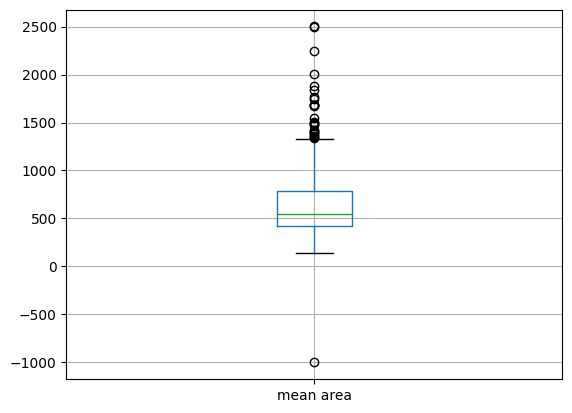

In [ ]:
# Al revisar los datos vemos que todos los datos son positivos,
# con excepcion de los datos de la variable 'mean area'.
# Que ademas tiene un valor relativamente mayor al resto

# Ploteamos esa variable en un boxplot para analizarlo
boxplot = df.boxplot(['mean area'])
boxplot.plot()
plt.show()

# Vemos claramente un outlier de magnitud negativa

In [ ]:
# Buscamos la ubicacion del outlier en la columna de 'mean area'
idx_outlier = df.index[df['mean area'] < 0].tolist()
print('El outlier se encuentra en la fila: %s' % idx_outlier)

El outlier se encuentra en la fila: [0]


In [ ]:
# Obtamos por eliminar la fila con el outlier
df.drop(idx_outlier,inplace=True,axis=0)

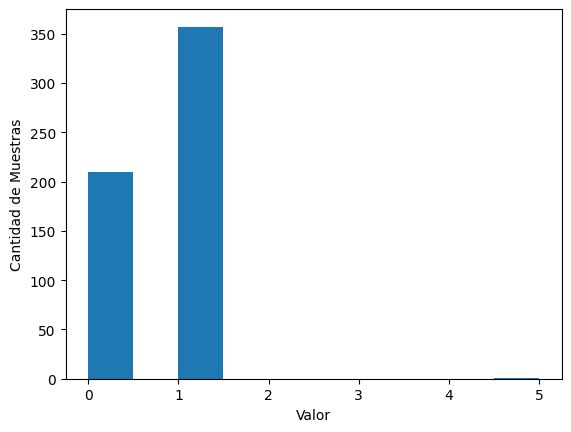

In [ ]:
# Del analisis anterior pudimos observar que la columna 'target' deberia ser binaria,
# no obstante, se puede apreciar un valor maximo de 5.

# Ploteamos en un histograma esta columna para ver sus valores
plt.hist(x=df['target'])
plt.xlabel('Valor')
plt.ylabel('Cantidad de Muestras')
plt.show()

# Se puede observar minimamente que no todos los valores son binarios

In [ ]:
# Buscamos la ubicacion del outlier en la columna de 'mean area'
idx_nonbin = df.index[df['target'] >1].tolist()
print('Los no binarios se encuentran en la fila: %s' % idx_nonbin)

Los no binarios se encuentran en la fila: [130]


In [ ]:
# Obtamos por eliminar la fila con el valor no binario
df.drop(idx_nonbin,inplace=True,axis=0)

In [ ]:
# Reseteamos los indices y visualizamos algunas filas del DataFrame
df.reset_index(drop=True, inplace=True)
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
5,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
6,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
7,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
8,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0
9,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,0


In [ ]:
# Mostramos nuevamente el numero de filas y columnas
print('Nuevo # Filas: %s, # Columnas: %s' % (df.shape[0],df.shape[1]))

Nuevo # Filas: 567, # Columnas: 31


# Visualización

<Axes: >

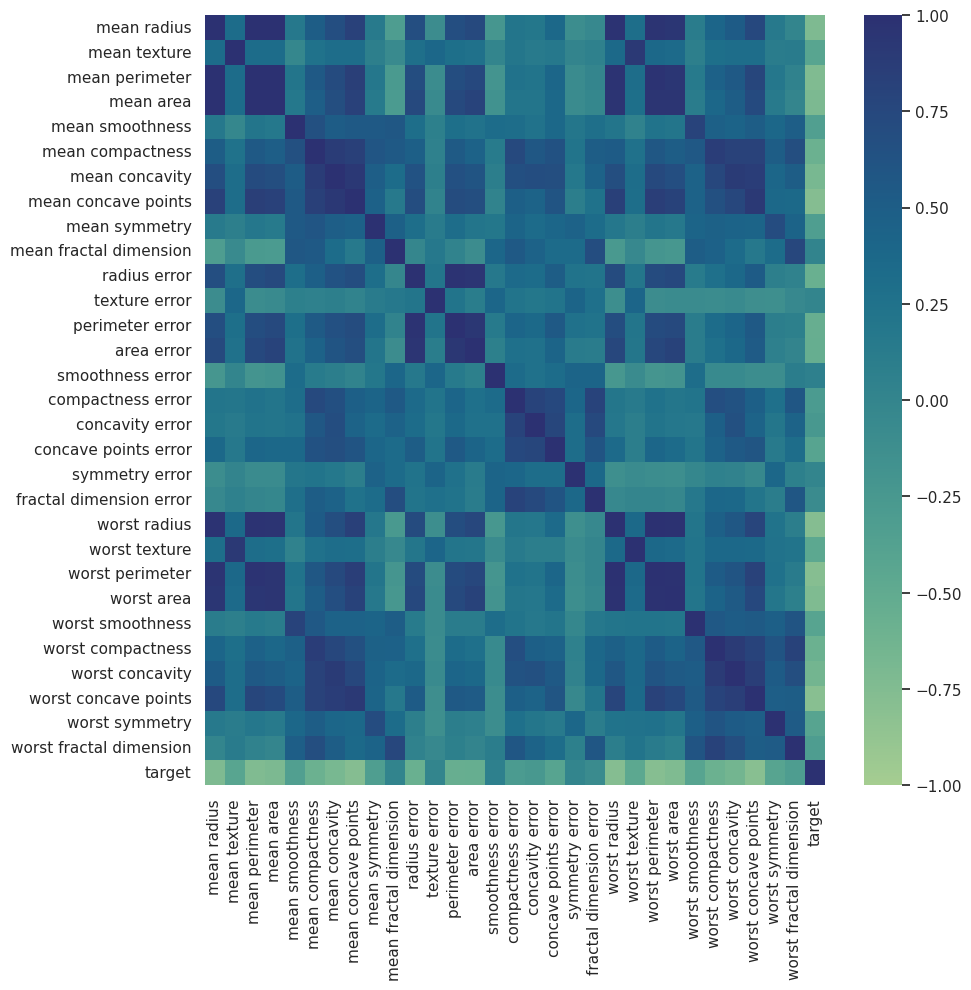

In [ ]:
# Visualizamos la correlación entre variables
sns.set (rc = {'figure.figsize':(10,10)})
sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=False,cmap="crest")
# Vemos que exsten algunas variables con un alta correlación

In [ ]:
# Estandarizmos el DataFrame para poder visualizar mejor los graficos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)

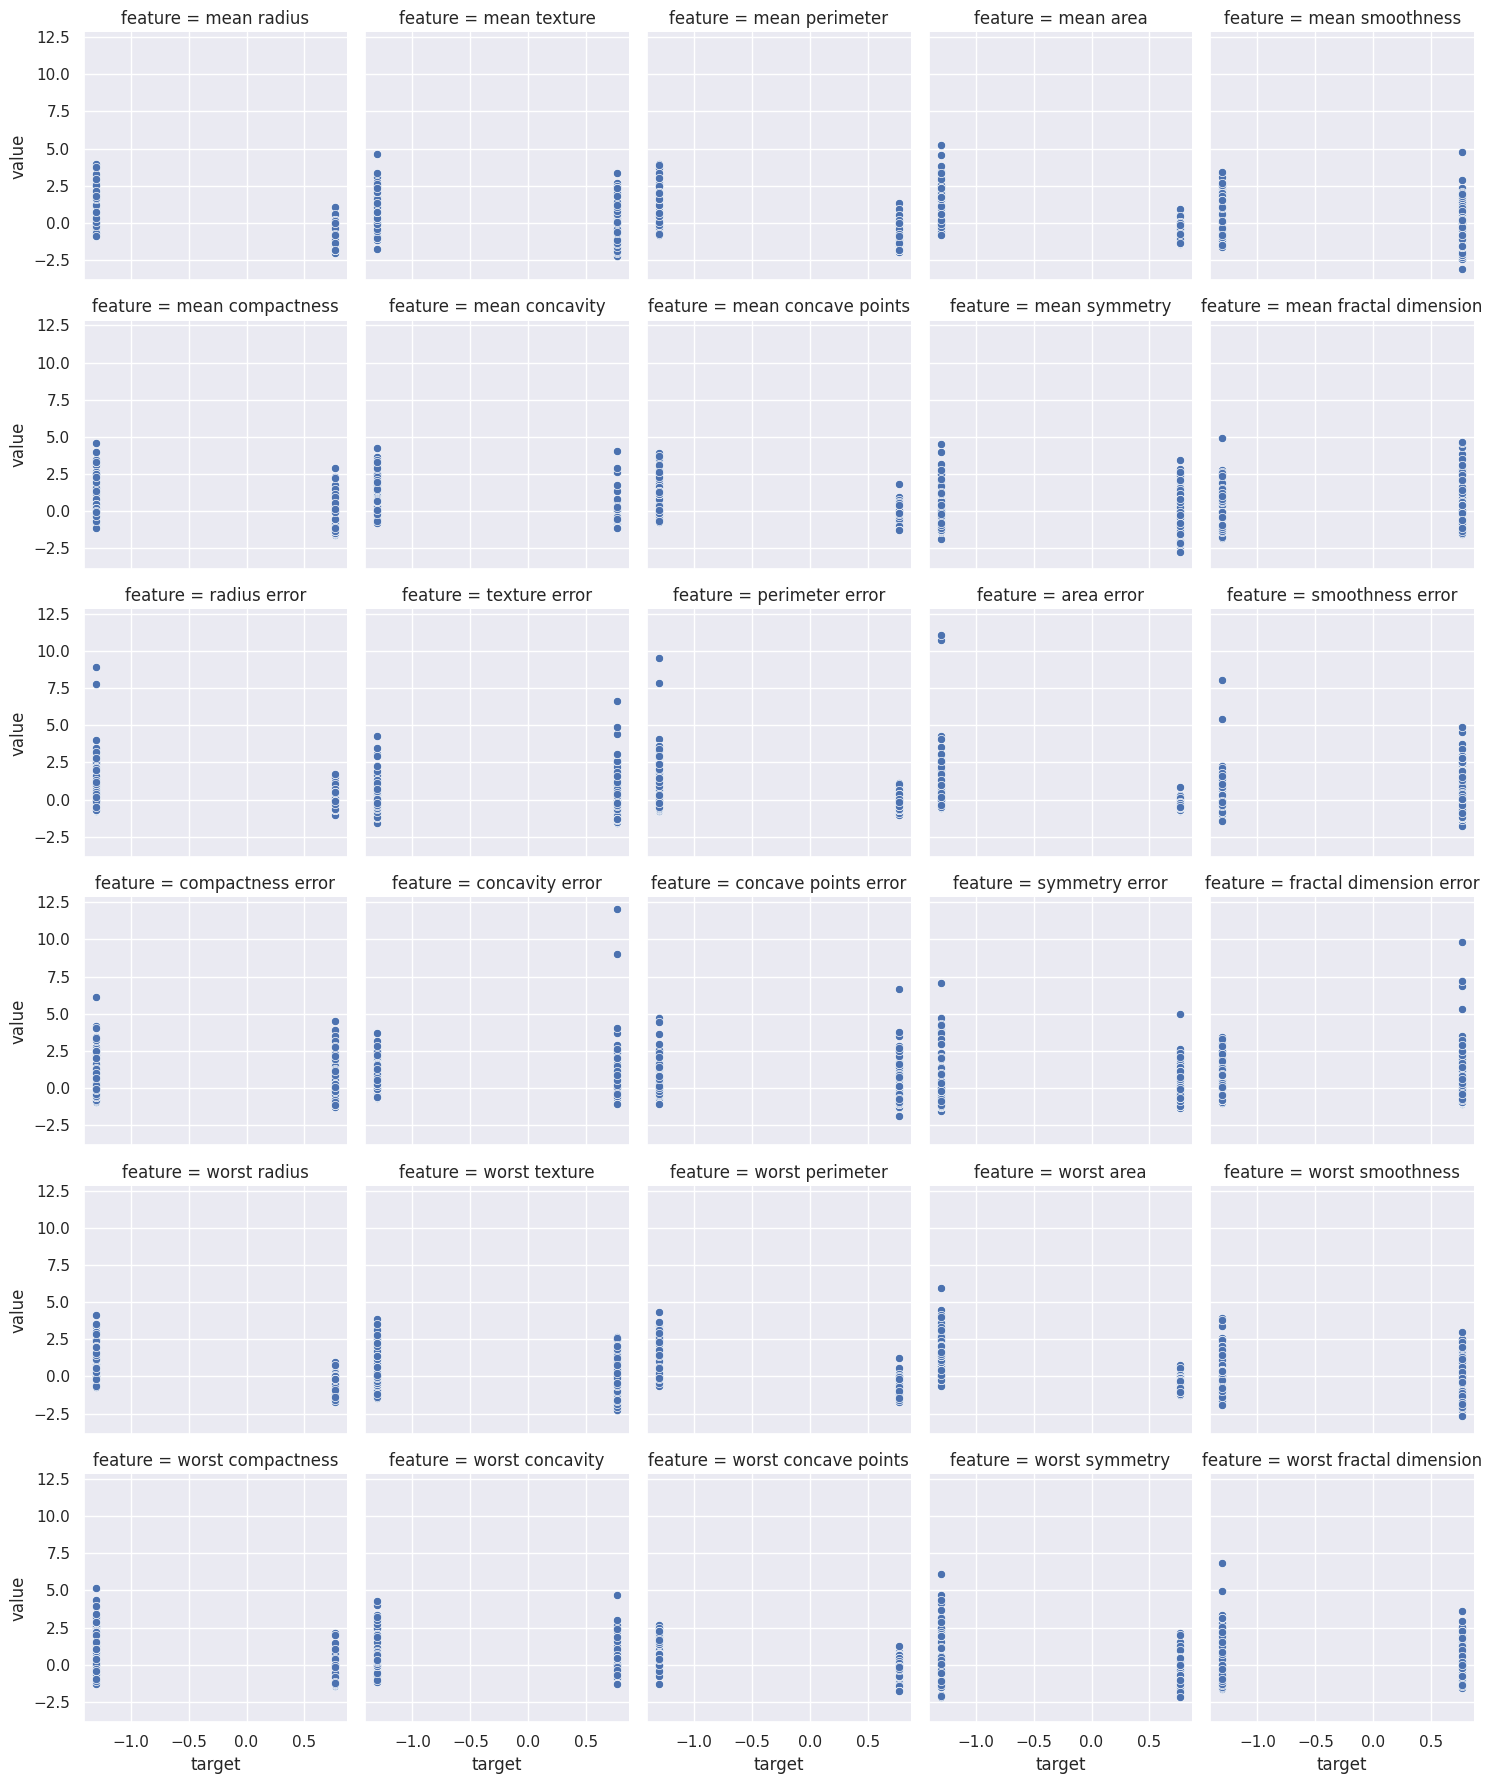

In [ ]:
# Visualizamos las variables independientes vs la variable dependiente con un scatter plot
m = standardized_df.melt(id_vars=['target'], var_name='feature')
g = sns.FacetGrid(m, col='feature', col_wrap=5)
g.map_dataframe(sns.scatterplot, x='target', y='value')

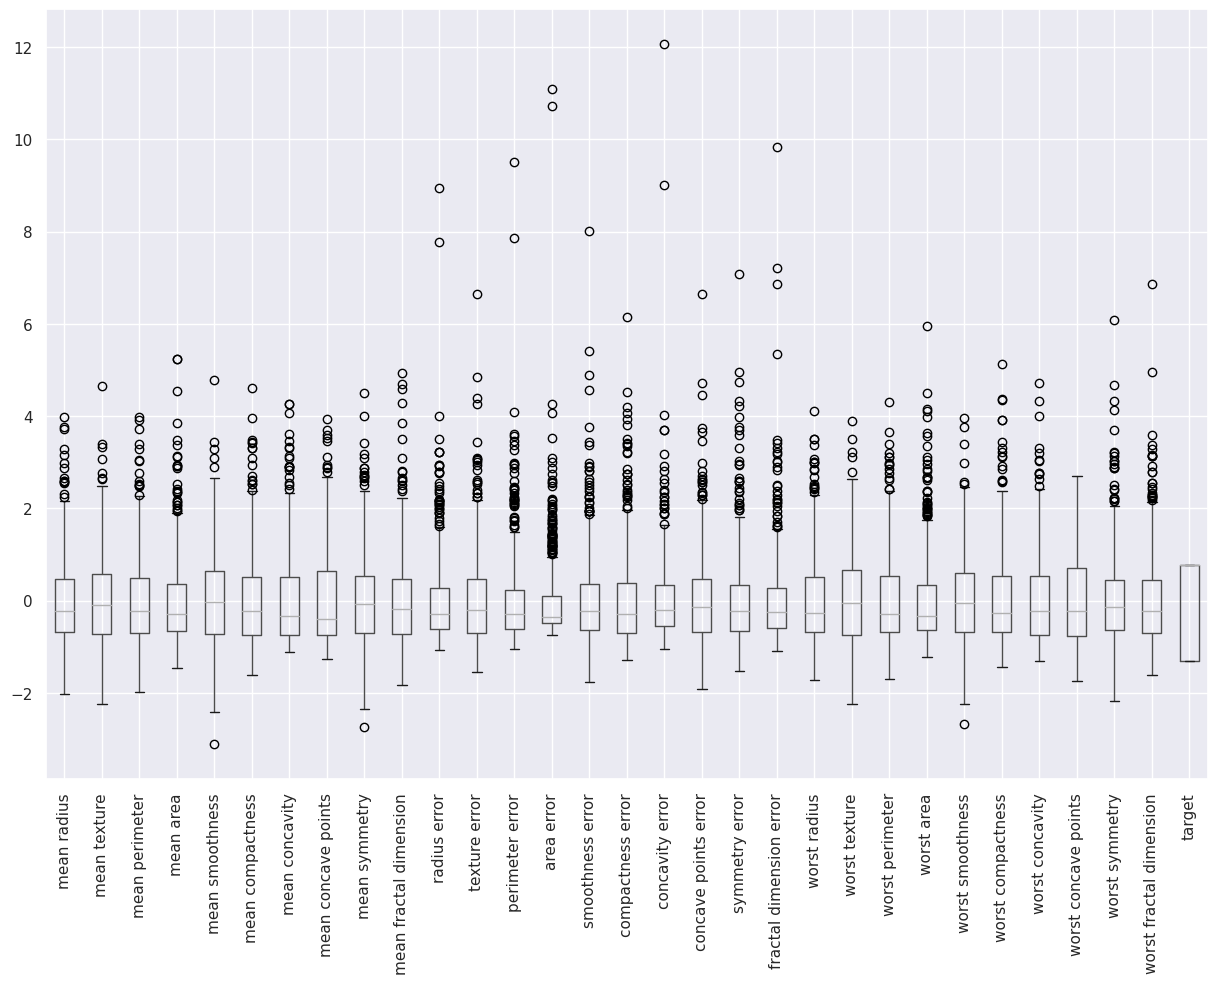

In [ ]:
# Realizamos graficos boxplot para ver la distribución de valores para cada variable
fig = plt.figure(figsize=(15,10))

boxplot = standardized_df.boxplot(column=list(df.columns))
boxplot.plot()

plt.xticks(rotation=90)
plt.show()

# Probando algunos modelos de ML

In [ ]:
target_name = "target"
target = df[target_name] # Guardar columna de resultados
data = df.drop(columns=[target_name]) # Guardar el resto de la data

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

In [ ]:
ss = StandardScaler()
data_train = ss.fit_transform(data_train)
data_test = ss.transform(data_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=25).fit(data_train, target_train)
gnb_tuned = GaussianNB().fit(data_train, target_train)
rf_tuned = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10).fit(data_train, target_train)
lgbm_tuned = LGBMClassifier(random_state=42, num_leaves=30, max_depth=5, n_estimators=300).fit(data_train, target_train)
xgb_tuned = XGBClassifier(random_state=42, max_depth=5).fit(data_train, target_train)

In [ ]:
rf_tuned.fit(data_train, target_train)
knn_tuned.fit(data_train, target_train)
gnb_tuned.fit(data_train, target_train)
lgbm_tuned.fit(data_train, target_train)
xgb_tuned.fit(data_train, target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score
# Result
models = [("KNN", knn_tuned),
          ("GNB", gnb_tuned),
          ("RF", rf_tuned),
          ("LGBM", lgbm_tuned),
          ("XGB", xgb_tuned)
         ]

for name, model in models:
    y_pred = model.predict(data_test)
    acc = accuracy_score(target_test, y_pred)
    msg = "%s: (%f)" % (name, acc)
    print(msg)

KNN: (0.950704)
GNB: (0.943662)
RF: (0.957746)
LGBM: (0.957746)
XGB: (0.943662)


## Conclusiones


*   Es necesario pre-procesar un poco mas la data, algunas variables tienen un alta correlacion entre ellas, lo que podria implicar que no sea viable utilizar algunos modelos de regresión.
*   Para algunas variables, la distribución de los datos es muy dispersa, y sus valores extremos se encuentran muy alejados de la tendencia, lo que podría implicar que se encuentran fuera del rango biológico viable; sin embargo, esto se debe verificar con una búsqueda de la literatura científica respecto a las características viables del tumor.
*   La correlación entre el target y las variables evaluadas es en general leve, siendo las variables con mayor correlación mean fractal dimension, texture error, smoothness error, symmetry error y fractal dimension error.
*   Para todos los modelos evaluados sobre la data procesada se obtuvo un valor de accuracy superior al 90%, lo que indica una elevada precisión y posibles fines aplicativos en un entorno clínico.
